# White Nose Syndrome Gone "Batty" Project Notebook

<hr>
Bella Larson, Elizabeth Letch, Chloe Marshall, Serena Strode

In [2]:
# Imports

from IPython.core.display import Image
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.optimize
import scipy.stats as stats
from scipy.optimize import minimize
import seaborn as sns

## Introduction

### Background Information
<div>
  <figure style="float: right; margin-left: 10px; width: 400px; text-align: center;">
    <img src="orca_wns_RyanvonLinden.jpg" alt="Description" style="width: 100%;">
    <figcaption style="font-size: 12px; color: gray;">Figure 1 shows a bat with fungal growth. NPS photo/von Linden</figcaption>
  </figure>
   White Nose Syndrome (WNS) is a fungal disease present in bat populations around the world caused by the $\textit{Pseudogymnoascus destructans (Pd)}$ fungal pathogen [1]. The emergence of the disease in the northeast of the United States caused a “mass mortality of hibernating bats,” which rapidly decreased the region’s populations of once-common species starting in 2006. Transmission of the disease is often bat-to-bat and to date has spread more slowly in the western regions of North America than the eastern regions [2]. The fungus grows on the nuzzles and wings of bats, which then disturbs their hibernation cycle, leading to dehydration, exhaustion, starvation, and eventually death [3]. 
    
White nose syndrome is still spreading, and it is not fully understood what the ecological and economical impacts could be resulting from declining bat populations. Bats are one of the most powerful sources of pest control available, saving over $3 billion annually [4] in pest control across the entire agricultural sector. While WNS only affects bats in the United States, the techniques that could be used to develop models for its spread are not specific to this disease, and we could apply these models to other diseases in the natural world, such as chronic wasting disease, which primarily affects deer in the United States [5]. 

By providing a model of how WNS affects populations, this model can then be applied to current bat populations to better understand the fallout that could occur. Because WNS can have a nearly 100% fatality rate in bat populations [6], it is crucial to understand how it spreads through a population and how this can be monitored and better understood.
</div>

### Data Identification 
We are using data from the White-Nose Syndrome Response Team, which has data tracking WNS positive cases, WNS suspected cases, Pd confirmed cases, and Pd presumed cases dating back to 2006 [7]. 

[wns_county_status](wns_county_status.csv)

## Implementation

### Data Pre-Processing

<div>
  <figure style="float: right; margin-left: 10px; width: 400px; text-align: center;">
    <img src="regions_map.jpg" alt="Description" style="width: 100%;">
    <figcaption style="font-size: 12px; color: gray;">Figure 2 shows North America split into its major time zones.</figcaption>
  </figure>
    Here, we are going to read in our .csv file of data, which has 5 columns, and 708 rows. The first column indicates whether the data is from the United States or Canada ("country"). The next column indicates the state (USA) or province (Canada) the data is coming from ("stateprov"). The third column gives the name of the county the data is from ("county"). The fourth column gives the current status of the county as Pd Presumed, Pd Positive, WNS Suspect, or WNS Positive ("determination"). The fifth column includes a date for when that determination data was released ("release_date"). The last column gives the data collection season (a range of two years) for when the most recent status was determined ("status_season").

We know that WNS started in the Northeastern region of North America and has since spread westward. We would like to be able to visualize these geographic regions in order to make predictions about WNS in Western North America, using Eastern North America as our example. To do this, we created five regions, based on the common time zones in North America (Pacific, Mountain, Central, Eastern, Atlantic). We disregarded that certain Canadian provinces have their own time zones, and if a state exists in multiple time zones, we chose the one that accounted for the largest portion of the state. We then created a dictionary to map each state or province (from "stateprov") into its corresponding region. We added a "Region" column to our data frame.
</div>

In [6]:
# Read in the data provided by White Nose Response Team
df = pd.read_csv("wns_county_status.csv")

# Create a dictionary to sort the state data into their appropriate time zones
region_mapping = {
         'Wyoming' : 'Mountain', 'Nebraska' : "Central", 'Mississippi': "Central", 
         'Missouri': "Central", 'South Dakota': "Central",
         'Washington': "Pacific", 'Kansas': "Central", 'Texas': "Central", 
        'North Dakota': "Central", 'Alberta': "Mountain",
       'Saskatchewan': "Mountain", 'British Columbia': "Pacific", 'Quebec': "Eastern",
       'Newfoundland and Labrador': "Atlantic", 'Manitoba': "Central", 'New Brunswick': "Atlantic",
       'Ontario': "Eastern", 'Newfoundland': "Atlantic", 'Nova Scotia': "Atlantic", 'Prince Edward': "Atlantic",
       'Louisiana': "Central", 'California': "Pacific", 'Michigan': "Eastern", 'South Carolina': "Eastern",
       'Wisconsin': "Central", 'Alabama': "Central", 'Minnesota': "Central", 'Oklahoma': "Central", 'Montana': "Mountain",
       'Georgia': "Eastern", 'Utah': "Mountain", 'Colorado': "Mountain", 'New Mexico': "Mountain", 'Arkansas': "Central",
       'Massachusetts': "Eastern", 'Idaho': "Mountain", 'Indiana': "Eastern", 'Iowa': "Central", 'North Carolina': "Eastern",
       'Pennsylvania': "Eastern", 'Illinois': "Central", 'New York': "Eastern", 'Tennessee': "Central", 'Virginia': "Eastern",
       'Kentucky': "Eastern", 'West Virginia': "Eastern", 'Ohio': "Eastern", 'Maryland': "Eastern", 'Delaware': "Eastern",
       'New Jersey': "Eastern", 'Connecticut': "Eastern", 'Rhode Island': "Eastern", 'Vermont': "Eastern",
       'New Hampshire': "Eastern", 'Maine': "Eastern"   
}

# Add a new column for the region
df['Region'] = df['stateprov'].map(region_mapping)

df.head()

,country,stateprov,county,determination,release_date,status_season,Region
0,USA,Wyoming,Laramie,WNS Positive,08/02/2024,2022-23,Mountain
1,USA,Wyoming,Albany,WNS Positive,08/02/2024,2022-23,Mountain
2,USA,Wyoming,Washakie,Pd Positive,08/02/2024,2023-24,Mountain
3,USA,Nebraska,Lancaster,Pd Positive,6/7/17,2016-17,Central
4,USA,Nebraska,Dixon,Pd Positive,6/7/17,2016-17,Central


### Plotting WNS Spread

<div>
  <figure style="float: right; margin-left: 10px; width: 400px; text-align: center;">
    <img src="WNS_spread_map_2024-11-18.png.png" alt="Description" style="width: 100%;">
    <figcaption style="font-size: 12px; color: gray;">Figure 3 shows the spread of WNS in North America.</figcaption>
  </figure>
    We want to observe how our data set models the spread of the disease in comparison to an actual map of how WNS has spread in the United States, pictured to the right. This map shows the locations of WNS cases over time, with blues indicating earlier cases than reds and orange. From this legend, we can track the spread of WNS from the Northeast originally to more recent cases emerging in the West. To replicate this, we grouped the number of each determination in each region. We were then able to create a grouped bar chart, plotting the regions from West to East along the horizontal axis, and the number of each determination reported along the vertical axis. The figure to the right and the figure below show us the density of WNS in the Northeast of North America, with far greater counts of WNS in the Eastern timezone than anywhere else. Our model below doesn't factor time into the graph, but the visualization helps to understand the regions most affected, and use that information to drive future predictive models.
</div>

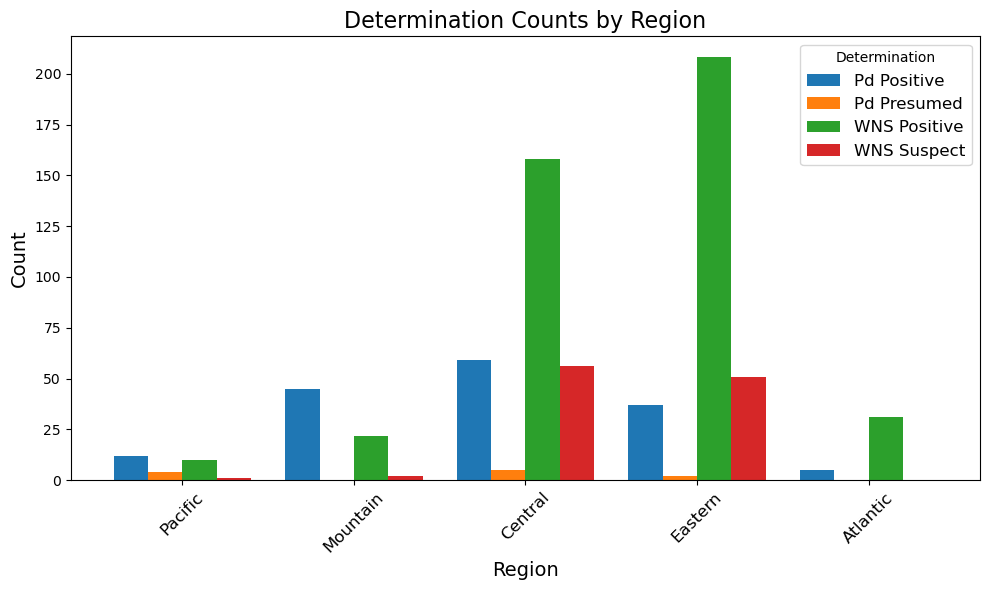

In [8]:
# Group by Region and Determination, then count occurrences
determination_counts = df.groupby(["Region", "determination"]).size().unstack(fill_value=0)

# Reorder regions to follow the actual time zones of North America, from West to East
region_order = ["Pacific", "Mountain", "Central", "Eastern", "Atlantic"]

# Count the determinations based on the order of regions
determination_counts = determination_counts.loc[region_order]

# Plot the grouped bar chart
determination_counts.plot(kind="bar", figsize=(10, 6), width=0.8)

# Customize the chart
plt.title("Determination Counts by Region", fontsize=16)
plt.xlabel("Region", fontsize=14)
plt.ylabel("Count", fontsize=14)
plt.xticks(rotation=45, fontsize=12)
plt.legend(title="Determination", fontsize=12)
plt.tight_layout()

# Show the plot
plt.show()

### Creating a New Data Frame

Next, we wanted to create a new data frame that reflected the information we were most interested in. To do this, we identified all the seasons from the "status_season" column. Then, we initialized the lists that would become our new columns in the data frame, which capture the region, season, and the numbers of each determination. We iterated through both "Regions" and "status_season" to add a counter for the number of each determination in all unique seasons within a region. 

Here, we established $\textbf{Assumption 1: If a given county's determination is "WNS Positive", then in the previous season, it was "Pd Positive"}$. 

To test if our iteration and Boolean Indexing worked as it should've, we printed a list of the regions and the counts for Pd Positive entries.

In [10]:
# Create a list of the status seasons logged in the data
seasons = np.sort(df["status_season"].unique())

# Create blank lists to create a new data frame from
regions = []
status_season_entries = []
wns_pos_entries = []
pd_pos_entries = []
wns_sus_entries = []
pd_sus_entries = []

# Sort based on region
for region in df["Region"].unique():
    for status_season_n in range(len(seasons)):
        wns_pos = 0
        pd_pos = 0
        wns_sus = 0
        pd_sus = 0
        
        # Create a counter from the last entry in the appropriate column
        if status_season_n > 0:
            wns_pos += wns_pos_entries[-1]
            pd_pos += pd_pos_entries[-1]
            wns_sus += wns_sus_entries[-1]
            pd_sus += pd_sus_entries[-1]
        
        # Sort by cases and the appropriate status season
        for idx, entry in df[(df["Region"] == region) & (df["status_season"] == seasons[status_season_n])].iterrows():
            match entry["determination"]:
                
                # Assumption 1: Counties go from Pd Presumed to Pd Positive to WNS Suspect to WNS Positive
                case "WNS Positive":
                    wns_pos += 1
                    if status_season_n != 0:
                        pd_pos_entries[-1] += 1
                case "Pd Positive":
                    pd_pos += 1
                case "WNS Suspect":
                    wns_sus += 1
                case "Pd Presumed":
                    pd_sus += 1
                
        # Add values to newly created lists for a new data frame
        regions.append(region)
        status_season_entries.append(seasons[status_season_n])
        pd_pos_entries.append(pd_pos)
        wns_pos_entries.append(wns_pos)
        wns_sus_entries.append(wns_sus)
        pd_sus_entries.append(pd_sus)

# Testing to check our Boolean Indexing and looping
print(regions, pd_pos_entries)

['Mountain', 'Mountain', 'Mountain', 'Mountain', 'Mountain', 'Mountain', 'Mountain', 'Mountain', 'Mountain', 'Mountain', 'Mountain', 'Mountain', 'Mountain', 'Mountain', 'Mountain', 'Mountain', 'Mountain', 'Mountain', 'Central', 'Central', 'Central', 'Central', 'Central', 'Central', 'Central', 'Central', 'Central', 'Central', 'Central', 'Central', 'Central', 'Central', 'Central', 'Central', 'Central', 'Central', 'Pacific', 'Pacific', 'Pacific', 'Pacific', 'Pacific', 'Pacific', 'Pacific', 'Pacific', 'Pacific', 'Pacific', 'Pacific', 'Pacific', 'Pacific', 'Pacific', 'Pacific', 'Pacific', 'Pacific', 'Pacific', 'Eastern', 'Eastern', 'Eastern', 'Eastern', 'Eastern', 'Eastern', 'Eastern', 'Eastern', 'Eastern', 'Eastern', 'Eastern', 'Eastern', 'Eastern', 'Eastern', 'Eastern', 'Eastern', 'Eastern', 'Eastern', 'Atlantic', 'Atlantic', 'Atlantic', 'Atlantic', 'Atlantic', 'Atlantic', 'Atlantic', 'Atlantic', 'Atlantic', 'Atlantic', 'Atlantic', 'Atlantic', 'Atlantic', 'Atlantic', 'Atlantic', 'Atlantic

Below, we actually create the new data frame, with six columns and 90 rows. This data frame shows us how many cases of each determination were identified in each season, for every region. 

In [12]:
# Create a new data frame to track regions through status seasons
df2 = pd.DataFrame()
df2["region"] = regions
df2["status_season"] = status_season_entries
df2["wns_pos"] = wns_pos_entries
df2["pd_pos"] = pd_pos_entries
df2["wns_suspected"] = wns_sus_entries
df2["pd_presumed"] = pd_sus_entries

df2

,region,status_season,wns_pos,pd_pos,wns_suspected,pd_presumed
0,Mountain,2006-07,0,0,0,0
1,Mountain,2007-08,0,0,0,0
2,Mountain,2008-09,0,0,0,0
3,Mountain,2009-10,0,0,0,0
4,Mountain,2010-11,0,0,0,0
...,...,...,...,...,...,...
85,Atlantic,2019-20,31,4,0,0
86,Atlantic,2020-21,31,5,0,0
87,Atlantic,2021-22,31,5,0,0
88,Atlantic,2022-23,31,5,0,0


### Creating an Epidemic Model

Using this new data frame, we wanted to create a working epidemiology model, based on methods used in class. Since the disease first started in the Eastern timezone, we had the largest and most complete data set for that region. We used the Eastern region data as the foundation for the epidemiology model.

In [14]:
# Isolate the Eastern Region as it is where WNS first appeared (Most complete data over time)
Region = "Eastern"
df_eastern = df2[df2["region"] == Region]
df_eastern

,region,status_season,wns_pos,pd_pos,wns_suspected,pd_presumed
54,Eastern,2006-07,2,14,0,0
55,Eastern,2007-08,16,25,0,0
56,Eastern,2008-09,41,31,2,0
57,Eastern,2009-10,72,36,7,0
58,Eastern,2010-11,108,38,19,0
59,Eastern,2011-12,145,27,23,0
60,Eastern,2012-13,171,19,34,1
61,Eastern,2013-14,188,17,41,1
62,Eastern,2014-15,198,11,47,1
63,Eastern,2015-16,201,13,50,1


We established three populations: healthy $(h)$, Pd positive $(p)$, and WNS positive $(w)$. We created three differential equations to model the spread of the disease:
$$\begin{align} \\
\frac{dh}{dt} &= -ahp \\
\frac{dp}{dt} &= ahp - kp \\
\frac{dw}{dt} &= kp
\end{align}$$

Breaing down the parameters, $a$ is the infection rate of the $Pd$ fungus and $k$ is the rate of WNS occurance. The healthy population declines based on the infection rate and number of $Pd$ positive cases. The $Pd$ positive population increases with healthy bats becoming infected and decreases as bats succumb to WNS. The WNS positive population increases with an increasing population of $Pd$ positive bats becoming WNS positive. 

In [16]:
def chi_squared(params,data,t):

    # unpacking the parameters 
    a = params[0]
    k = params[1]
    
    # compute the fit
    integrated = scipy.integrate.odeint(epidemic_rhs, hpw_0, t, args=(a, k))

    fit = integrated[:,2]
    # computing the chi-squared
    vals = (data - fit)**2 / fit
    
    return np.sum(vals)

[0.00696272 0.60758136]


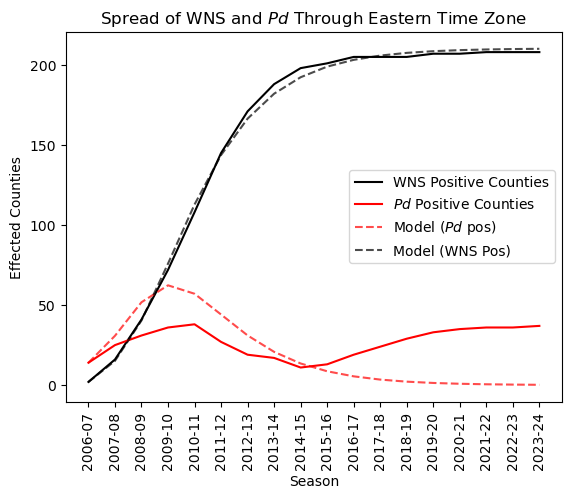

In [17]:
# Create time list to integrate over
t = np.arange(0,18)


# Create epidemic model with differential equations
def epidemic_rhs(hpw, t, a, k):
    h,p,w = hpw
    dh_dt = -a * h * p  
    dp_dt = a * h * p - k * p
    dw_dt = k * p 
    
    return np.array([dh_dt, dp_dt, dw_dt])


# Create inital conditions for healthy, Pd positive, and WNS positive counties
# Healthy counties found by dividing total counties in North America with caves evenly amongst time zones
hpw_0 = [214, 14, 2]


# Create variable values by optimizing with chi squared
ans = scipy.optimize.minimize(chi_squared, [0.006, 0.7], args=(df_eastern["wns_pos"], t),
                       bounds=[ (0, 1), (0, 1) ] )

print(ans.x)

a = ans.x[0]
k = ans.x[1]

# Solve for model projections
hpw = scipy.integrate.odeint(epidemic_rhs, hpw_0, t, args=(a, k))
h = hpw[:,0]
p = hpw[:,1]
w = hpw[:,2]


# Plot the results
plt.plot(df_eastern["status_season"], df_eastern["wns_pos"], label="WNS Positive Counties", color = 'black')
plt.plot(df_eastern["status_season"], df_eastern["pd_pos"], label="$Pd$ Positive Counties", color = 'red')
plt.plot(t, p, '--', color = 'red', alpha = 0.7, label='Model ($Pd$ pos)')
plt.plot(t, w, '--', color = 'black', alpha = 0.7, label='Model (WNS Pos)')
plt.xlabel('Season')
plt.ylabel('Effected Counties')
plt.title('Spread of WNS and $Pd$ Through Eastern Time Zone')
plt.xticks(rotation = 90) 
plt.legend()
plt.show()

### Applying the Epidemic Model

Plotted above are the actual trend of $Pd$ positive counties and WNS positive in the Eastern region along with their predictive best fits from our integration equation above. We were able to obtain fairly close fits with our integration, as demonstrated in dashed lines. Using this model, we extended the concepts to the region that was infected next: the Central Region. 

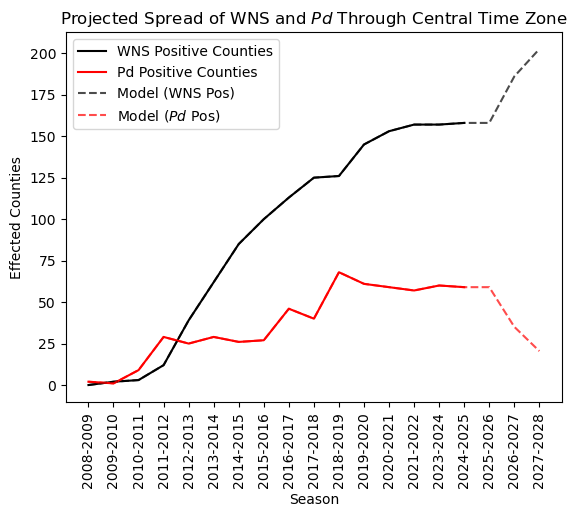

In [19]:
# Isolate region of interst
Region = "Central"
df4 = df2[df2["region"] == Region]

# Only find cases in the specific region where cases are present
df_central = df4[df4['pd_pos'] > 0]

remaining_int_t = np.arange(0,3)

# Use intial conditons of last staus season
hpw_0 = [15, 59, 158]

# Create list for axis labels
axis = ['2008-2009','2009-2010','2010-2011','2011-2012','2012-2013','2013-2014','2014-2015','2015-2016',
        '2016-2017','2017-2018','2018-2019','2019-2020','2020-2021','2021-2022','2023-2024','2024-2025',
        '2025-2026', '2026-2027', '2027-2028']


# Create list of time stamps to match labels to
axis_t = np.arange(0,19)

# Extrapolate with same epidemic model from above, using constants found to be best match in most complete data set
hpw = scipy.integrate.odeint(epidemic_rhs, hpw_0, remaining_int_t, args=(a, k))
h = hpw[:,0]
p = hpw[:,1]
w = hpw[:,2]


# Turn data frame into lists to be added to extrapolated data
pd_pos = df_central['pd_pos'].tolist()
wns_pos = df_central['wns_pos'].tolist()


# Combine extrapolated data and current data to be plotted
for extrapolated in p:
    pd_pos.append(extrapolated)

for extrapolated in w:
    wns_pos.append(extrapolated)

# Plot results
plt.plot(df_central["status_season"], df_central["wns_pos"], label="WNS Positive Counties", color = 'black');
plt.plot(df_central["status_season"], df_central["pd_pos"], label="Pd Positive Counties", color = 'red')
plt.plot(wns_pos,'--', color = 'black', alpha = 0.7, label='Model (WNS Pos)')
plt.plot(pd_pos, '--', color = 'red', alpha = 0.7, label='Model ($Pd$ Pos)')
plt.xlabel('Season')
plt.ylabel('Effected Counties')
plt.title('Projected Spread of WNS and $Pd$ Through Central Time Zone')
plt.xticks(axis_t, axis)
plt.xticks(rotation = 90)
plt.legend()
plt.show()

Using the epidemic model we created with data for the Eastern region, we were able to extend and extrapolate data for the Central region. The dashed lines show a projection for the $Pd$ positive and WNS positive populations. We continued this same pattern with the Mountain region below. 

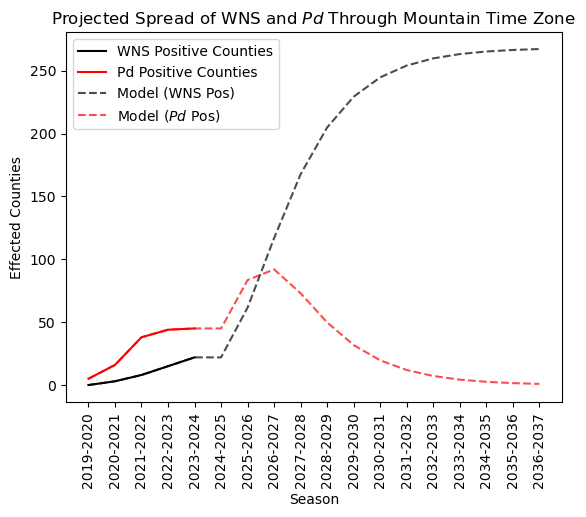

In [21]:
# Isolate region of interst
Region = "Mountain"
df4 = df2[df2["region"] == Region]

# Only find cases in the specific region where cases are present
df_mountain = df4[df4['pd_pos'] > 0]


# Use intial conditons of last staus season
hpw_0 = [214, 45, 22]

#Create list for axis labels
axis = ['2019-2020','2020-2021','2021-2022','2022-2023','2023-2024','2024-2025','2025-2026','2026-2027',
        '2027-2028','2028-2029','2029-2030','2030-2031','2031-2032','2032-2033','2033-2034','2034-2035','2035-2036',
        '2036-2037']

# Create list for remaining time to get to 18 seasons of data
remaining_int_t = np.arange(0,13)


# Create list of time stamps to match labels to
axis_t = np.arange(0,18)

# Extrapolate with same epidemic model from above, using constants found to be best match in most complete data set
hpw = scipy.integrate.odeint(epidemic_rhs, hpw_0, remaining_int_t, args=(a, k))
h = hpw[:,0]
p = hpw[:,1]
w = hpw[:,2]


# Turn data frame into lists to be added to extrapolated data
pd_pos = df_mountain['pd_pos'].tolist()
wns_pos = df_mountain['wns_pos'].tolist()


# Combine extrapolated data and current data to be plotted
for extrapolated in p:
    pd_pos.append(extrapolated)

for extrapolated in w:
    wns_pos.append(extrapolated)

# Plot results
plt.plot(df_mountain["status_season"], df_mountain["wns_pos"], label="WNS Positive Counties", color = 'black');
plt.plot(df_mountain["status_season"], df_mountain["pd_pos"], label="Pd Positive Counties", color = 'red')
plt.plot(wns_pos,'--', color = 'black', alpha = 0.7, label='Model (WNS Pos)')
plt.plot(pd_pos, '--', color = 'red', alpha = 0.7, label='Model ($Pd$ Pos)')
plt.xlabel('Season')
plt.ylabel('Effected Counties')
plt.title('Projected Spread of WNS and $Pd$ Through Mountain Time Zone')
plt.xticks(axis_t, axis)
plt.xticks(rotation = 90)
plt.legend()
plt.show()

Most of this data is extrapolated, a projection based on our epidemic model. However, since WNS is still so new to the Mountain region, our model can serve as a valuable indicator of what may be coming for the bat populations in this region over the next decade or so.

# Results and Discussion

We started with the Eastern region because it $(a)$ represents the real-world ground zero for WNS and $(b)$ had the largest amount of data, covering roughly 18 years of WNS tracking. We were able to obtain fairly accurate curves tracking $p$ and $w$ populations by guessing at the $a$ and $k$ parameters. After performing numerical integration with the differential equations we established, we found predictive model curves for each population. WNS follows a roughly logistic growth curve while $Pd$ shows more of a rise-and-fall or humped-shaped curve. These curve shapes make sense when examining the biological dynamics of an epidemic like WNS. Infection rates will naturally rise over time as interactions between populations of bats occurs. This point was controlled by our second assumption: $\textbf{Assumption 2: Bats are not migrating from region to region, only interacting with bats within the same region.}$ Once the fungus spreads enough, it can develop into WNS. WNS is a fatal disease, so it grows logistically, controlled by the infected ($Pd$ positive) population and some growth rate $k$ until it reaches a peak amount of bats. Once the bats die from the disease, though, they can no longer support the spread of the disease. While this is occurring, the number of $Pd$ positive counties declines as the status of disease develops into WNS positive.

We were able to create a successful epidemiology model for the Eastern region. Since we had the most data for the Eastern region, we had the greatest ability to accurately model the behavior of WNS in that region. This is also an accurate representation of the diseases' origins and spread. Our guesses at the $a$ and $k$ parameters produced similar fits to our numerically integrated model curve, confirming that we have a good example model that can be applied. Our next two figures represent predictive modeling. Parallel to the spread of WNS, we next moved westward to the Central region. Most of the data for this model came from our data frame, but the last five or so years of data are predictive, based on the combination of trends observed in that region and the mathematical model created earlier. From that predictive model, it can be inferred that the $Pd$ positive population is on the way to its decline in the next few years as WNS spikes by 2028. Continuing the projection even more, we focused on the Mountain region, as that it where the disease next spread and becuase it hits close to home. Only the first five years on this plot come from our data frame, with the next 13 years being extrapolated by the epidemiology model. 


### Error Analysis

Our largest sources of error came from the assumptions we had to make. Outside of the two assumptions stated earlier, we made many assumptions when determining the total "healthy" population size. We had to assume that there were $(a)$ caves in every county and $(b)$ an equal amount of caves in every county. To accomplish this, we found a rough estimate of the number of caves in North America, though the exact count is protect by the government, and we divided this number by the five regions we created. Another error comes from the fact that the counties do not necessarily correlate with the number of bats. In the Eastern region, counties tend to be smaller, creating larger numbers of cases which can compount to seemlingly greater numbers of $Pd$ positive or WNS positive bats. Lastly, our $Pd$ positive curves are "smaller" than our WNS positive curves because the data set we found doesn't show when a county that is now determined to be WNS positive became WNS positive from $Pd$ positive.

# Next Steps

A good next step for this project would be to add a "healthy population" curve to our epidemiology models. The issue we had with doing this was that the number would be so far above the $Pd$ positive and WNS positive curves that the relationship between those and their unique shapes would be lost. However, if we were to keep working, we would figure out a better way to model this in the context of all caves in North America. Another step we'd take is to explore the effect of cave cleaning or other preventative measures. This would affect the $Pd$ positive curve, allowing it to decline, preventing WNS. There is no current preventative measure in place, though, to stop the spread of the $Pd$ fungus. There is also no current understanding of a way to heal bats with WNS, but if there were a medictaion, including a recovery curve would help. A recovery curve, would show the healthy population beginning to increase again, with declining counts of WNS positive. The last step we'd want to take would be to explore other factors affecting $Pd$ growth, such as climate, and mapping $Pd$ cases compared to that factor we explore.

### References

[1] Cheng TL, Reichard JD, Coleman JTH, et al. “The scope and severity of white-nose syndrome on hibernating bats in North America,” Conserv Biol. 2021, vol. 35(5) pp. 1586-1597. doi:10.1111/cobi.13739 

[2] Blejwas, Karen et al. “Could White-Nose Syndrome Manifest Differently in Myotis Lucifugus in Western Versus Eastern Regions Of North America? A Review Of Factors,” Journal of wildlife diseases, 2023, vol. 59(3), pp. 381-397. doi:10.7589/JWD-D-22-00050 

[3] “White-Nose Syndrome Killed Over 90% of Three North American Bat Species | U.S. Geological Survey,” www.usgs.gov, Apr. 21, 2021. https://www.usgs.gov/news/national-news-release/white-nose-syndrome-killed-over-90-three-north-american-bat-species 

[4] C. Celley, “Bats are one of the most important misunderstood animals,” FWS.gov, https://www.fws.gov/story/bats-are-one-most-important-misunderstood-animals#:~:text=Bats%20play%20an%20essential%20role,United%20States%20corn%20industry%20alone. (accessed Oct. 7, 2024). 

[5] Bryan J Richards, “Chronic Wasting Disease distribution in the United States by state and county (ver. 2.0, April 2024).” U.S. Geological Survey, Apr. 23, 2024. doi: 10.5066/P9HQKKFO. 

[6] White-Nose Syndrome Response Team, “White-Nose Syndrome,” Whitenosesyndrome.org, 2019. https://www.whitenosesyndrome.org/static-page/what-is-white-nose-syndrome

[7] “White-Nose Syndrome,” www.whitenosesyndrome.org. https://www.whitenosesyndrome.org/where-is-wns